<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(0__3)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-3'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n120-3.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,46.674581,21.277429,24.408283,1.348183,103.708476,102.092496,1.615979
1,0.0,1.0,50.837485,25.790747,32.454071,-1.012975,118.069329,118.875970,-0.806641
2,0.0,2.0,21.103982,84.198304,59.811858,0.858329,175.972473,175.012284,0.960190
3,0.0,3.0,63.383046,96.421706,34.565730,-0.810411,203.560072,204.194292,-0.634220
4,0.0,4.0,73.127476,21.349385,30.294966,0.445412,135.217240,134.601497,0.615743
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,22.597257,43.771850,76.507190,0.865099,153.741397,152.854851,0.886545
119996,999.0,116.0,53.347850,56.872374,41.047959,0.124569,161.392751,161.181914,0.210838
119997,999.0,117.0,56.102009,92.803257,87.841639,-0.679264,246.067642,246.601755,-0.534113
119998,999.0,118.0,31.351664,94.969773,50.470137,-0.489557,186.302017,186.391543,-0.089526


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    46.674581  21.277429  24.408283  ...  103.708476  102.092496  1.615979
      1.0    50.837485  25.790747  32.454071  ...  118.069329  118.875970 -0.806641
      2.0    21.103982  84.198304  59.811858  ...  175.972473  175.012284  0.960190
      3.0    63.383046  96.421706  34.565730  ...  203.560072  204.194292 -0.634220
      4.0    73.127476  21.349385  30.294966  ...  135.217240  134.601497  0.615743
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  22.597257  43.771850  76.507190  ...  153.741397  152.854851  0.886545
      116.0  53.347850  56.872374  41.047959  ...  161.392751  161.181914  0.210838
      117.0  56.102009  92.803257  87.841639  ...  246.067642  246.601755 -0.534113
      118.0  31.351664  94.969773  50.470137  ...  186.302017  186.391543 -0.089526
      119.0  22.217176  27.331299  58.687693  ...  116.667313  118.257961 -1.590648

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    46.674581  21.277429  24.408283  ...  103.708476  102.092496  1.615979
      1.0    50.837485  25.790747  32.454071  ...  118.069329  118.875970 -0.806641
      2.0    21.103982  84.198304  59.811858  ...  175.972473  175.012284  0.960190
      3.0    63.383046  96.421706  34.565730  ...  203.560072  204.194292 -0.634220
      4.0    73.127476  21.349385  30.294966  ...  135.217240  134.601497  0.615743
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  22.597257  43.771850  76.507190  ...  153.741397  152.854851  0.886545
      116.0  53.347850  56.872374  41.047959  ...  161.392751  161.181914  0.210838
      117.0  56.102009  92.803257  87.841639  ...  246.067642  246.601755 -0.534113
      118.0  31.351664  94.969773  50.470137  ...  186.302017  186.391543 -0.089526
      119.0  22.217176  27.331299  58.687693  ...  116.667313  118.257961 -1.590648

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,46.674581,21.277429,24.408283,1.348183,103.708476,102.092496,1.615979
1,0.0,1.0,50.837485,25.790747,32.454071,-1.012975,118.069329,118.875970,-0.806641
2,0.0,2.0,21.103982,84.198304,59.811858,0.858329,175.972473,175.012284,0.960190
3,0.0,3.0,63.383046,96.421706,34.565730,-0.810411,203.560072,204.194292,-0.634220
4,0.0,4.0,73.127476,21.349385,30.294966,0.445412,135.217240,134.601497,0.615743
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,22.597257,43.771850,76.507190,0.865099,153.741397,152.854851,0.886545
119996,999.0,116.0,53.347850,56.872374,41.047959,0.124569,161.392751,161.181914,0.210838
119997,999.0,117.0,56.102009,92.803257,87.841639,-0.679264,246.067642,246.601755,-0.534113
119998,999.0,118.0,31.351664,94.969773,50.470137,-0.489557,186.302017,186.391543,-0.089526


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    46.674581  21.277429  24.408283  ...  103.708476  102.092496  1.615979
      1.0    50.837485  25.790747  32.454071  ...  118.069329  118.875970 -0.806641
      2.0    21.103982  84.198304  59.811858  ...  175.972473  175.012284  0.960190
      3.0    63.383046  96.421706  34.565730  ...  203.560072  204.194292 -0.634220
      4.0    73.127476  21.349385  30.294966  ...  135.217240  134.601497  0.615743
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  22.597257  43.771850  76.507190  ...  153.741397  152.854851  0.886545
      116.0  53.347850  56.872374  41.047959  ...  161.392751  161.181914  0.210838
      117.0  56.102009  92.803257  87.841639  ...  246.067642  246.601755 -0.534113
      118.0  31.351664  94.969773  50.470137  ...  186.302017  186.391543 -0.089526
      119.0  22.217176  27.331299  58.687693  ...  116.667313  118.257961 -1.590648

[120000 rows x 7 columns]

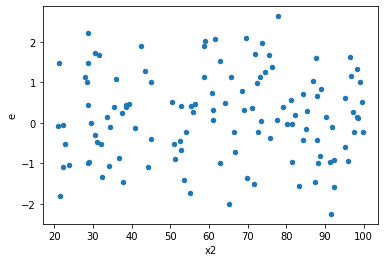

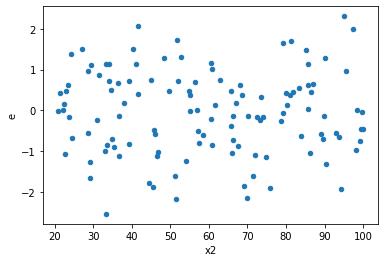

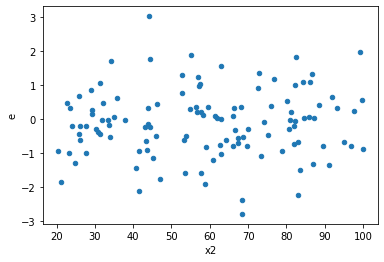

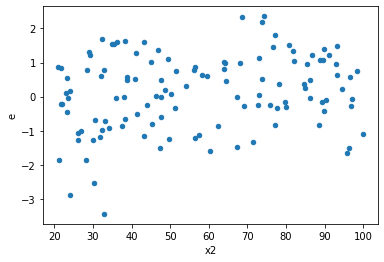

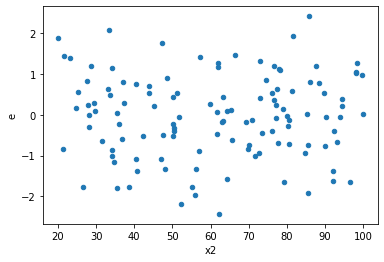

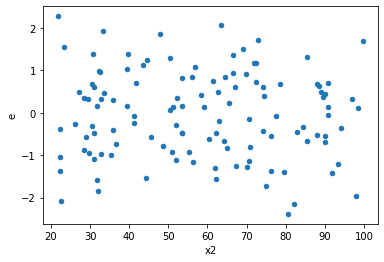

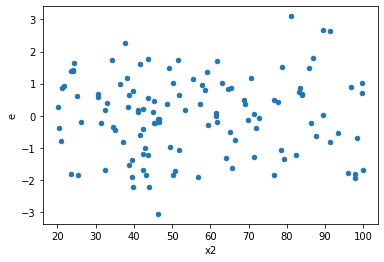

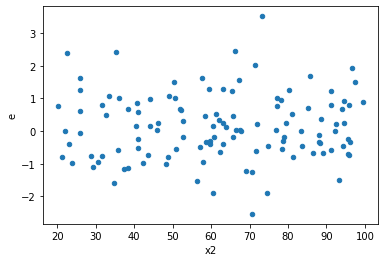

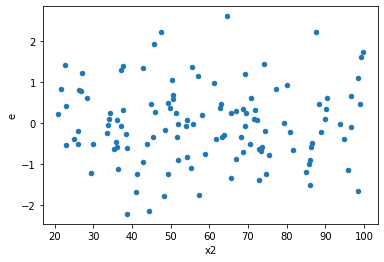

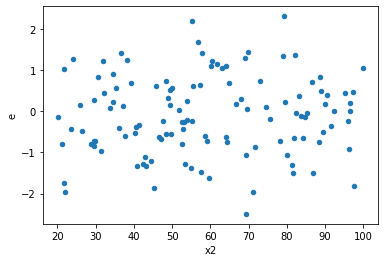

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,59.0,55.0,64.67992422555865,70.3427048114242,1.0962699021281128,1.2789582692986219,1.166645428115712,0.5652771872547926,0.7173614063726037,0.2826385936273963,Reject005=1 : Homoscedasticity
2.0,53.0,61.0,40.105522226545126,55.60673628498516,0.7567079665385873,0.9115858407374616,1.2046732439032364,0.480586690152625,0.7597066549236875,0.2402933450763125,Reject005=1 : Homoscedasticity
3.0,52.0,62.0,49.638772724247616,69.49691034160755,0.954591783158608,1.1209179087356056,1.1742379606774407,0.5417143701695282,0.7291428149152359,0.2708571850847641,Reject005=1 : Homoscedasticity
5.0,62.0,52.0,67.29824809246173,56.57385452762119,1.0854556143945442,1.087958740915792,1.0023060606882983,0.9993398036119789,0.5003300981940105,0.49966990180598947,Reject005=1 : Homoscedasticity
6.0,58.0,56.0,50.04926213558352,64.30199277009191,0.8629183126824744,1.1482498708944984,1.330658828325291,0.28495207143699,0.857523964281505,0.142476035718495,Reject005=1 : Homoscedasticity
10.0,57.0,57.0,59.363223198419796,66.30738734048333,1.041460056112628,1.163287497201462,1.1169775454889448,0.6776495920881116,0.6611752039559442,0.3388247960440558,Reject005=1 : Homoscedasticity
12.0,47.0,67.0,41.81547930759036,68.23194496625712,0.8896910490976672,1.0183872383023451,1.144652673908772,0.6048572852951426,0.6975713573524287,0.3024286426475713,Reject005=1 : Homoscedasticity
13.0,55.0,59.0,53.42972409014933,80.11607749727088,0.9714495289118059,1.3578996185978116,1.3978076865392046,0.2074622042971319,0.896268897851434,0.10373110214856596,Reject005=1 : Homoscedasticity
15.0,55.0,59.0,50.45087922113763,59.64035640783272,0.9172887131115933,1.0108534984378428,1.1020014571081578,0.7128255963519581,0.643587201824021,0.35641279817597904,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,59.0,55.0,64.67992422555865,70.3427048114242,1.0962699021281128,1.2789582692986219,1.166645428115712,0.5652771872547926,Reject005=1 : Homoscedasticity
1.0,56.0,58.0,60.44650714152906,46.2726438363818,1.0794019132415904,0.7978042040755483,0.7391169075100432,0.2579306050445686,Reject005=1 : Homoscedasticity
2.0,53.0,61.0,40.105522226545126,55.60673628498516,0.7567079665385873,0.9115858407374616,1.2046732439032364,0.480586690152625,Reject005=1 : Homoscedasticity
3.0,52.0,62.0,49.638772724247616,69.49691034160755,0.954591783158608,1.1209179087356056,1.1742379606774407,0.5417143701695282,Reject005=1 : Homoscedasticity
4.0,45.0,69.0,42.94420491075718,55.32761051996897,0.9543156646834928,0.8018494278256373,0.8402350055645138,0.5377612767264761,Reject005=1 : Homoscedasticity
5.0,62.0,52.0,67.29824809246173,56.57385452762119,1.0854556143945442,1.087958740915792,1.0023060606882983,0.9993398036119789,Reject005=1 : Homoscedasticity
6.0,58.0,56.0,50.04926213558352,64.30199277009191,0.8629183126824744,1.1482498708944984,1.330658828325291,0.28495207143699,Reject005=1 : Homoscedasticity
7.0,56.0,58.0,56.39889762096837,52.48218582473681,1.0071231718030067,0.9048652728402898,0.898465349794654,0.6887410250982827,Reject005=1 : Homoscedasticity
8.0,57.0,57.0,76.19603232595088,74.32619674632787,1.3367724969465067,1.3039683639706643,0.9754601975648254,0.9256019496746909,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      947
Reject005=0 : Heteroscedasticity     53
Name: Result_test, dtype: int64